In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

The data comes from : https://hbiostat.org/data/repo/titanic3.xls

In [5]:
data = pd.read_excel('titanic3.xls')  

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
data.shape

(1309, 14)

### Problem Definition

I have a dataset with 1309 samples (people) who embarked the titanic. I want to predict who is more likely to die according to the features I have about them and find some correlation with what I know.

## Exploring the data

In [8]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
data.describe(exclude=np.number)

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [15]:
data['pclass'].unique()

array([1, 2, 3], dtype=int64)

Data dictionnary:
- pclass: Passenger class (1 = first; 2 = second; 3 = third)
- survival: Survival (0 = no; 1 = yes) -> target value
- name: Full Name and title of the passenger
- sex: Sex (female or male)
- age: Age of the passenger
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)
- home.dest: Their home destination

### Data distribution

In [16]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [79]:
# separating the numerical and categorical features to have different types of graph
cat = ['survived','sex','embarked','pclass']
# Not using 'name', 'ticket', 'home.dest', 'body' and 'cabin' for now since almost unique, I might extract features from them
num = data.drop(columns=cat+['name','ticket', 'home.dest', 'cabin', 'boat', 'body']).columns

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E 

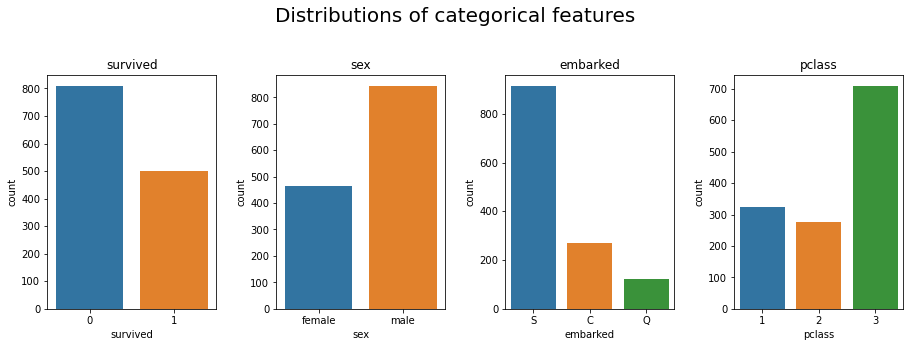

In [80]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Distributions of categorical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.countplot(data[col], ax=ax)
    ax.set_title(col)
plt.tight_layout(pad=2)

In [81]:
for c in cat:
    print(data[c].value_counts()/data[c].count(), '\n\n')

0    0.618029
1    0.381971
Name: survived, dtype: float64 


male      0.644003
female    0.355997
Name: sex, dtype: float64 


S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64 


3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64 




Most of our data did not survived (60%) <br>
Most are males (65%) <br>
Most embarked in S (70%) <br>
And are in class 3(55%) <br>
CONCLUSION: data not very balanced: target value 60-40

In [82]:
for c in cat:
    print(pd.crosstab(data[c],data['survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

survived    0    1
survived          
0         1.0  0.0
1         0.0  1.0 


survived     0     1
sex                 
female    0.27  0.73
male      0.81  0.19 


survived     0     1
embarked            
C         0.44  0.56
Q         0.64  0.36
S         0.67  0.33 


survived     0     1
pclass              
1         0.38  0.62
2         0.57  0.43
3         0.74  0.26 




Very interesting results: female have a survival rate higher than male, those who embarked in C are more likely to survive than the others and those in class 1 also. It makes sense since the one in class 1 were the one that were saved first with less people in the boat. 

In [83]:
data['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
7          23
16         23
8          23
6          20
D          20
12         19
2          12
A          11
B           9
1           5
C D         2
13 15       2
5 7         2
8 10        1
13 15 B     1
5 9         1
15 16       1
2           1
Name: boat, dtype: int64

In [84]:
num

Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')

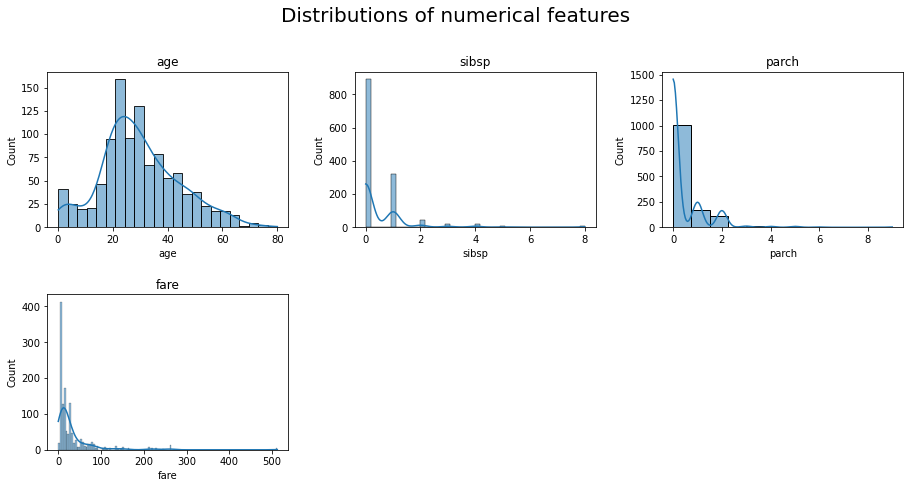

In [85]:
fig = plt.figure(figsize=(13, 7))
fig.suptitle('Distributions of numerical features', fontsize=20)
num_cols = 3
num_rows = np.ceil(len(num) / num_cols).astype(int)

for i, col in enumerate(num):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout(pad=2)


Most people in the data set are between 20 to 40 <br>
Most dont have siblings <br>
most dont have parents <br>
Most paid between 0 and 50 (0 has to be investigated)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## None Values

In [106]:
# percentage of none values in columns containing none values
data.isna().sum()[data.isna().sum()>0]/data.shape[0]

age          0.200917
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

### Fare

In [107]:
# the fare is very dependent on the class, let's understand what are the fares
data.groupby('pclass')['fare'].agg(['mean','median','std', 'min', 'max'])

,mean,median,std,min,max
pclass,,,,,
1,87.508992,60.0000,80.447178,0.0,512.3292
2,21.179196,15.0458,13.607122,0.0,73.5000
3,13.302889,8.0500,11.494358,0.0,69.5500


I see I have 0 for every class, I would guess it means either in the data, the values where they did not have info, they replaced it by with 0 (for example people that bought their ticket through someone else) or some people got the ticket for free

In [109]:
(data['fare']==0).sum()

17

Only 17 of them have a fare of 0. Not worst the time investigating

In [110]:
data[data['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [115]:
data['fare'].fillna(data.groupby('pclass')['fare'].transform('median'), inplace=True)

### embarked

In [116]:
data[data['embarked'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [123]:
data.groupby('embarked')['pclass'].value_counts()

embarked  pclass
C         1         141
          3         101
          2          28
Q         3         113
          2           7
          1           3
S         3         495
          2         242
          1         177
Name: pclass, dtype: int64

In [127]:
data[data['cabin'].str.contains(r'B', na=True)]

TypeError: 'StringMethods' object is not callable

In [118]:
data['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [120]:
data[data['cabin']=='B26']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S,7,NaN,"Milwaukee, WI"
